In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings


In [5]:
df = pd.read_csv('Data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Lets try to predict the maths score with all the other independent features


In [6]:
X =  df.drop(columns=['math score'],axis=1)
y = df['math score']

In [7]:
# Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print("Numeric Features: ",num_features,"\nCategorical features: ",cat_features)

Numeric Features:  Index(['reading score', 'writing score'], dtype='object') 
Categorical features:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape
# 7 -> 19

(1000, 19)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 )
X_train.shape , X_test.shape

((800, 19), (200, 19))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, r2_square, rmse

In [18]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    # "Cat Boosting Regressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

In [19]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.8737
- Mean Absolute Error: 4.2831
- R2 Score: 5.3355
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8827
- Mean Absolute Error: 4.1738
- R2 Score: 5.3422


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8071
- Mean Absolute Error: 5.2063
- R2 Score: 6.5938
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8253
- Mean Absolute Error: 5.1579
- R2 Score: 6.5197


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.8743
- Mean Absolute Error: 4.2650
- R2 Score: 5.3233
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8806
- Mean Absolute Error: 4.2111
- R2 Score: 5.3904


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 0.8556
- Mean Absolute Error: 4.5137
- R2 Score: 5.7066
--------------------------

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Decision Tree,8.179242
3,KNeighborsRegressor,7.253041
1,Lasso,6.519695
6,AdaBoostRegressor,6.070167
5,Random Forest Regressor,5.971220
2,Ridge,5.390387
0,LinearRegression,5.342204


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.27


Text(0, 0.5, 'Predicted')

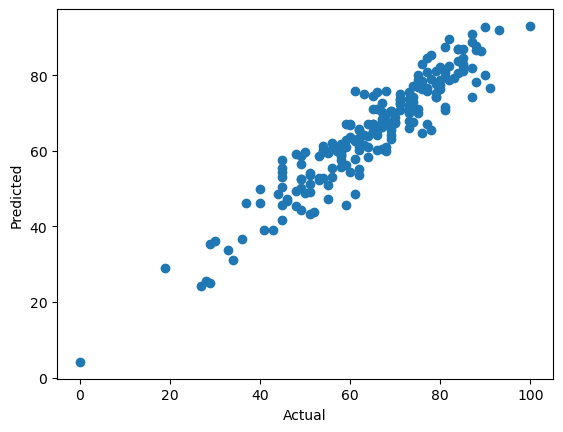

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

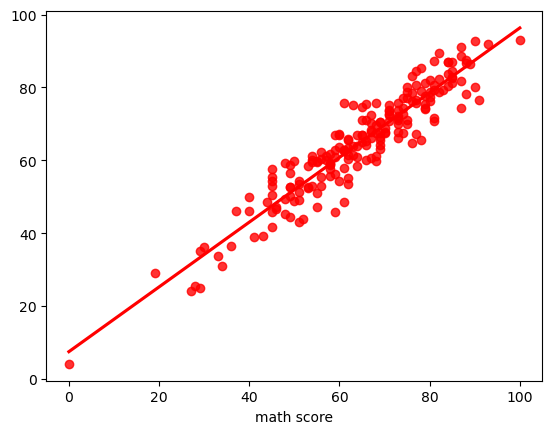

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.5000,14.5000
737,53,58.5625,-5.5625
740,80,77.4375,2.5625
660,74,77.1250,-3.1250
411,84,86.8750,-2.8750
...,...,...,...
408,52,43.9375,8.0625
332,62,61.3750,0.6250
208,74,67.5625,6.4375
613,65,67.0625,-2.0625
